The purpose of this notebook, adapted from the Geron text, is to understand more about RNN. For comparison, the same problem is run on a plain ANN.

In [1]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

import numpy as np
import tensorflow as tf
from tensorflow import keras

In [2]:
def generate_time_series(batch_size, n_steps):
    freq1, freq2, offsets1, offsets2 = np.random.rand(4, batch_size, 1)
    time = np.linspace(0, 1, n_steps)
    series = 0.5 * np.sin((time - offsets1) * (freq1 * 10 + 10))  #   wave 1
    series += 0.2 * np.sin((time - offsets2) * (freq2 * 20 + 20)) # + wave 2
    series += 0.1 * (np.random.rand(batch_size, n_steps) - 0.5)   # + noise
    return series[..., np.newaxis].astype(np.float32)

n_steps = 50
series = generate_time_series(10000, n_steps + 1)
X_train, y_train = series[:7000, :n_steps], series[:7000, -1]
X_valid, y_valid = series[7000:9000, :n_steps], series[7000:9000, -1]
X_test, y_test = series[9000:, :n_steps], series[9000:, -1]

[[ 0.24209453]
 [ 0.09061234]
 [ 0.04412831]
 [ 0.07207178]
 [ 0.05048967]
 [-0.0035534 ]
 [-0.06785482]
 [-0.2214183 ]
 [-0.40736213]
 [-0.55453265]
 [-0.6789488 ]
 [-0.6961992 ]
 [-0.5781018 ]
 [-0.3371482 ]
 [-0.17261204]
 [ 0.03022596]
 [ 0.17035979]
 [ 0.26605847]
 [ 0.2830541 ]
 [ 0.2816042 ]
 [ 0.24068713]
 [ 0.28013214]
 [ 0.3456585 ]
 [ 0.47923088]
 [ 0.5754067 ]
 [ 0.5055965 ]
 [ 0.4483104 ]
 [ 0.24165864]
 [ 0.0456325 ]
 [-0.20764908]
 [-0.38648608]
 [-0.4948461 ]
 [-0.49267456]
 [-0.49192792]
 [-0.42682648]
 [-0.26519415]
 [-0.2127078 ]
 [-0.25550056]
 [-0.28134555]
 [-0.26169658]
 [-0.25650322]
 [-0.08100218]
 [ 0.09112684]
 [ 0.32189724]
 [ 0.50268114]
 [ 0.636062  ]
 [ 0.6383169 ]
 [ 0.59732985]
 [ 0.47219697]
 [ 0.30372804]]
[0.11108915]


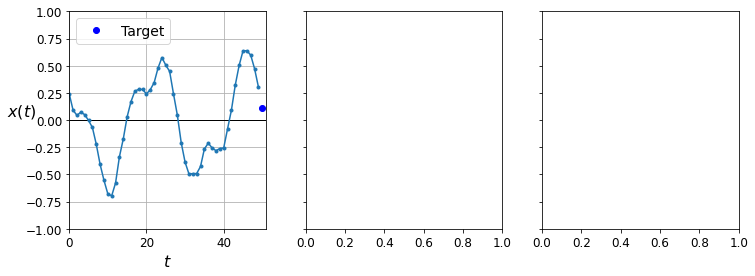

In [3]:
# Output the first training time series

print(X_valid[0])
print(y_valid[0])

def plot_series(series, y=None, y_pred=None, x_label="$t$", y_label="$x(t)$", legend=True):
    plt.plot(series, ".-")
    if y is not None:
        plt.plot(n_steps, y, "bo", label="Target")
    if y_pred is not None:
        plt.plot(n_steps, y_pred, "rx", markersize=10, label="Prediction")
    plt.grid(True)
    if x_label:
        plt.xlabel(x_label, fontsize=16)
    if y_label:
        plt.ylabel(y_label, fontsize=16, rotation=0)
    plt.hlines(0, 0, 100, linewidth=1)
    plt.axis([0, n_steps + 1, -1, 1])
    if legend and (y or y_pred):
        plt.legend(fontsize=14, loc="upper left")

fig, axes = plt.subplots(nrows=1, ncols=3, sharey=True, figsize=(12, 4))
for col in range(1):
    plt.sca(axes[col])
    plot_series(X_valid[col, :, 0], y_valid[col, 0],
                y_label=("$x(t)$" if col==0 else None),
                legend=(col == 0))
# save_fig("time_series_plot")
plt.show()

In [4]:
# Linear regression ANN

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[50, 1]),
    keras.layers.Dense(1)
])

np.random.seed(42)
tf.random.set_seed(42)

model.compile(loss="mse", optimizer="adam")
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid))

Epoch 1/10
219/219 [==============================] - 1s 2ms/step - loss: 0.4586 - val_loss: 0.1176
Epoch 2/10
219/219 [==============================] - 0s 2ms/step - loss: 0.0774 - val_loss: 0.0515
Epoch 3/10
219/219 [==============================] - 0s 2ms/step - loss: 0.0415 - val_loss: 0.0322
Epoch 4/10
219/219 [==============================] - 0s 2ms/step - loss: 0.0279 - val_loss: 0.0234
Epoch 5/10
219/219 [==============================] - 0s 2ms/step - loss: 0.0211 - val_loss: 0.0185
Epoch 6/10
219/219 [==============================] - 0s 2ms/step - loss: 0.0170 - val_loss: 0.0154
Epoch 7/10
219/219 [==============================] - 0s 2ms/step - loss: 0.0144 - val_loss: 0.0133
Epoch 8/10
219/219 [==============================] - 0s 2ms/step - loss: 0.0125 - val_loss: 0.0117
Epoch 9/10
219/219 [==============================] - 0s 2ms/step - loss: 0.0112 - val_loss: 0.0105
Epoch 10/10
219/219 [==============================] - 0s 2ms/step - loss: 0.0101 - val_loss: 0.0096

In [5]:
# A deeper ANN

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[50, 1]),
    keras.layers.Dense(20),
    keras.layers.Dense(20),
    keras.layers.Dense(1)
])

np.random.seed(42)
tf.random.set_seed(42)

model.compile(loss="mse", optimizer="adam")
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid))

Epoch 1/10
219/219 [==============================] - 1s 3ms/step - loss: 0.0723 - val_loss: 0.0103
Epoch 2/10
219/219 [==============================] - 0s 2ms/step - loss: 0.0083 - val_loss: 0.0062
Epoch 3/10
219/219 [==============================] - 1s 2ms/step - loss: 0.0059 - val_loss: 0.0052
Epoch 4/10
219/219 [==============================] - 1s 2ms/step - loss: 0.0050 - val_loss: 0.0059
Epoch 5/10
219/219 [==============================] - 0s 2ms/step - loss: 0.0045 - val_loss: 0.0041
Epoch 6/10
219/219 [==============================] - 0s 2ms/step - loss: 0.0040 - val_loss: 0.0043
Epoch 7/10
219/219 [==============================] - 0s 2ms/step - loss: 0.0040 - val_loss: 0.0038
Epoch 8/10
219/219 [==============================] - 0s 2ms/step - loss: 0.0038 - val_loss: 0.0037
Epoch 9/10
219/219 [==============================] - 0s 2ms/step - loss: 0.0037 - val_loss: 0.0039
Epoch 10/10
219/219 [==============================] - 1s 2ms/step - loss: 0.0035 - val_loss: 0.0038

In [6]:
# A simple RNN

model = keras.models.Sequential([
  keras.layers.SimpleRNN(1, input_shape=[None, 1])
])

np.random.seed(42)
tf.random.set_seed(42)

# optimizer = keras.optimizers.Adam(learning_rate=0.005)
model.compile(loss="mse", optimizer="adam")
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid))

Epoch 1/10
219/219 [==============================] - 3s 9ms/step - loss: 0.2055 - val_loss: 0.1313
Epoch 2/10
219/219 [==============================] - 2s 8ms/step - loss: 0.1017 - val_loss: 0.0851
Epoch 3/10
219/219 [==============================] - 2s 8ms/step - loss: 0.0763 - val_loss: 0.0686
Epoch 4/10
219/219 [==============================] - 2s 8ms/step - loss: 0.0626 - val_loss: 0.0570
Epoch 5/10
219/219 [==============================] - 2s 8ms/step - loss: 0.0528 - val_loss: 0.0486
Epoch 6/10
219/219 [==============================] - 2s 8ms/step - loss: 0.0455 - val_loss: 0.0424
Epoch 7/10
219/219 [==============================] - 2s 9ms/step - loss: 0.0399 - val_loss: 0.0375
Epoch 8/10
219/219 [==============================] - 2s 8ms/step - loss: 0.0355 - val_loss: 0.0336
Epoch 9/10
219/219 [==============================] - 2s 8ms/step - loss: 0.0319 - val_loss: 0.0304
Epoch 10/10
219/219 [==============================] - 2s 8ms/step - loss: 0.0289 - val_loss: 0.0278

In [7]:
# A deeper RNN

model = keras.models.Sequential([
    keras.layers.SimpleRNN(20, return_sequences=True, input_shape=[None, 1]),
    keras.layers.SimpleRNN(20, return_sequences=True),
    keras.layers.SimpleRNN(1)
])

np.random.seed(42)
tf.random.set_seed(42)

model.compile(loss="mse", optimizer="adam")
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid))

Epoch 1/10
219/219 [==============================] - 8s 29ms/step - loss: 0.0508 - val_loss: 0.0099
Epoch 2/10
219/219 [==============================] - 6s 28ms/step - loss: 0.0074 - val_loss: 0.0058
Epoch 3/10
219/219 [==============================] - 6s 28ms/step - loss: 0.0053 - val_loss: 0.0059
Epoch 4/10
219/219 [==============================] - 6s 28ms/step - loss: 0.0047 - val_loss: 0.0044
Epoch 5/10
219/219 [==============================] - 6s 27ms/step - loss: 0.0044 - val_loss: 0.0040
Epoch 6/10
219/219 [==============================] - 6s 28ms/step - loss: 0.0041 - val_loss: 0.0038
Epoch 7/10
219/219 [==============================] - 6s 28ms/step - loss: 0.0038 - val_loss: 0.0047
Epoch 8/10
219/219 [==============================] - 6s 28ms/step - loss: 0.0039 - val_loss: 0.0038
Epoch 9/10
219/219 [==============================] - 6s 28ms/step - loss: 0.0036 - val_loss: 0.0039
Epoch 10/10
219/219 [==============================] - 6s 28ms/step - loss: 0.0036 - val_lo

In [8]:
# Deeper RNN with a dense output

model = keras.models.Sequential([
    keras.layers.SimpleRNN(20, return_sequences=True, input_shape=[None, 1]),
    keras.layers.SimpleRNN(20),
    keras.layers.Dense(1)
])

np.random.seed(42)
tf.random.set_seed(42)

model.compile(loss="mse", optimizer="adam")
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid))

Epoch 1/10
219/219 [==============================] - 6s 21ms/step - loss: 0.0221 - val_loss: 0.0050
Epoch 2/10
219/219 [==============================] - 4s 20ms/step - loss: 0.0042 - val_loss: 0.0036
Epoch 3/10
219/219 [==============================] - 4s 20ms/step - loss: 0.0035 - val_loss: 0.0037
Epoch 4/10
219/219 [==============================] - 4s 20ms/step - loss: 0.0034 - val_loss: 0.0036
Epoch 5/10
219/219 [==============================] - 4s 20ms/step - loss: 0.0032 - val_loss: 0.0032
Epoch 6/10
219/219 [==============================] - 4s 20ms/step - loss: 0.0031 - val_loss: 0.0031
Epoch 7/10
219/219 [==============================] - 4s 20ms/step - loss: 0.0031 - val_loss: 0.0030
Epoch 8/10
219/219 [==============================] - 4s 20ms/step - loss: 0.0030 - val_loss: 0.0030
Epoch 9/10
219/219 [==============================] - 4s 20ms/step - loss: 0.0030 - val_loss: 0.0028
Epoch 10/10
219/219 [==============================] - 4s 20ms/step - loss: 0.0029 - val_lo

In [9]:
# An even deeper RNN

model = keras.models.Sequential([
    keras.layers.SimpleRNN(20, return_sequences=True, input_shape=[None, 1]),
    keras.layers.SimpleRNN(20, return_sequences=True),
    keras.layers.SimpleRNN(20, return_sequences=True),
    keras.layers.SimpleRNN(1)
])

np.random.seed(42)
tf.random.set_seed(42)

model.compile(loss="mse", optimizer="adam")
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid))

Epoch 1/10
219/219 [==============================] - 11s 39ms/step - loss: 0.0449 - val_loss: 0.0122
Epoch 2/10
219/219 [==============================] - 8s 37ms/step - loss: 0.0113 - val_loss: 0.0074
Epoch 3/10
219/219 [==============================] - 8s 37ms/step - loss: 0.0073 - val_loss: 0.0054
Epoch 4/10
219/219 [==============================] - 8s 37ms/step - loss: 0.0060 - val_loss: 0.0046
Epoch 5/10
219/219 [==============================] - 8s 37ms/step - loss: 0.0050 - val_loss: 0.0040
Epoch 6/10
219/219 [==============================] - 8s 37ms/step - loss: 0.0043 - val_loss: 0.0041
Epoch 7/10
219/219 [==============================] - 8s 37ms/step - loss: 0.0039 - val_loss: 0.0040
Epoch 8/10
219/219 [==============================] - 8s 37ms/step - loss: 0.0040 - val_loss: 0.0038
Epoch 9/10
219/219 [==============================] - 8s 37ms/step - loss: 0.0038 - val_loss: 0.0040
Epoch 10/10
219/219 [==============================] - 8s 37ms/step - loss: 0.0036 - val_l